# First steps with Frequency MOCs 

In [1]:
# Standard Library
from pathlib import Path

import matplotlib.pyplot as plt

# General and astronomy packages
import numpy as np
from astropy.units import Unit
from maser.data import Data

# Specific to FMOCs
from mocpy import FrequencyMOC

We use a file from the Cassini/RPWS/HFR database. This radio instrument has a configurable spectral sampling. 
The data file is a level 2 data file, containing the centers and widths of each spectral bin. 

The file (and many others) is available for download here: https://lesia.obspm.fr/kronos/data/2012_091_180/n2/

In [2]:
file = Path("../resources/FMOC/P2012180.20")

We load the data using the `maser.data` module, which recognizes the file 

In [3]:
n2 = Data(file)
n2.fields

dict_keys(['ydh', 'num', 't97', 'f', 'dt', 'df', 'autoX', 'autoZ', 'crossR', 'crossI', 'ant'])

In [4]:
n2.dataset

'co_rpws_hfr_kronos_n2'

Spectral sweeps are available as a generator using the `.sweeps` property.

In [5]:
sweep = next(n2.sweeps)
print(f"This sweep has {len(sweep.data)} spectral steps")
sweep.data.dtype

This sweep has 359 spectral steps


dtype([('ydh', '<u4'), ('num', '<u4'), ('t97', '<f8'), ('f', '<f4'), ('dt', '<f4'), ('df', '<f4'), ('autoX', '<f4'), ('autoZ', '<f4'), ('crossR', '<f4'), ('crossI', '<f4'), ('ant', 'i1')])

Then we get the central frequency and widths for each channel and we can infer the minimumm and maximum frequencyes for each sweep.

In [6]:
# Central frequency
freqs = np.float64(sweep.data["f"]) * Unit("kHz")
# Width of each channel
dfreq = np.float64(sweep.data["df"]) * Unit("kHz")

fmin = freqs - dfreq / 2
fmax = freqs + dfreq / 2

In [7]:
fmin

<Quantity [3.59346004e+00, 3.76642492e+00, 3.94767762e+00, 4.13760752e+00,
           4.33679996e+00, 4.54545017e+00, 4.76424021e+00, 4.99346252e+00,
           5.23380002e+00, 5.48564236e+00, 5.74967247e+00, 6.02637759e+00,
           6.31634259e+00, 6.62034759e+00, 6.93897747e+00, 7.27291517e+00,
           7.62293990e+00, 7.98973510e+00, 8.37427475e+00, 8.77724275e+00,
           9.19961263e+00, 9.64235981e+00, 1.01064596e+01, 1.05927899e+01,
           1.11025203e+01, 1.16368198e+01, 1.21968597e+01, 1.27838099e+01,
           1.33990354e+01, 1.40439003e+01, 1.47197704e+01, 1.54281074e+01,
           1.61705694e+01, 1.69488150e+01, 1.77644993e+01, 1.86193798e+01,
           1.95154055e+01, 2.04546218e+01, 2.14389833e+01, 2.24707273e+01,
           2.35521001e+01, 2.46855380e+01, 2.58734770e+01, 2.71186492e+01,
           2.84236876e+01, 2.97916125e+01, 3.12252542e+01, 3.27280197e+01,
           3.43030332e+01, 3.59538093e+01, 3.76841383e+01, 3.94976388e+01,
           4.13984023e+01

In [8]:
fmax

<Quantity [3.77774005e+00, 3.95957492e+00, 4.15012264e+00, 4.34979253e+00,
           4.55919995e+00, 4.77855019e+00, 5.00856023e+00, 5.24953751e+00,
           5.50220004e+00, 5.76695736e+00, 6.04452747e+00, 6.33542261e+00,
           6.64025760e+00, 6.95985261e+00, 7.29482247e+00, 7.64588518e+00,
           8.01385991e+00, 8.39946511e+00, 8.80372475e+00, 9.22735777e+00,
           9.67138766e+00, 1.01368398e+01, 1.06247396e+01, 1.11360099e+01,
           1.16718804e+01, 1.22335797e+01, 1.28223397e+01, 1.34393899e+01,
           1.40861655e+01, 1.47641003e+01, 1.54746304e+01, 1.62192925e+01,
           1.69998294e+01, 1.78179850e+01, 1.86754993e+01, 1.95742199e+01,
           2.05161955e+01, 2.15035768e+01, 2.25384184e+01, 2.36230723e+01,
           2.47599002e+01, 2.59514630e+01, 2.72003221e+01, 2.85093492e+01,
           2.98813127e+01, 3.13193876e+01, 3.28265494e+01, 3.44063797e+01,
           3.60621631e+01, 3.77975945e+01, 3.96166582e+01, 4.15231589e+01,
           4.35213975e+01

Now let's start playing with this F-MOCs. 

In [9]:
fmoc = FrequencyMOC.from_frequency_ranges(order=50, min_freq=fmin, max_freq=fmax)

We can plot it in frequency or wavelength

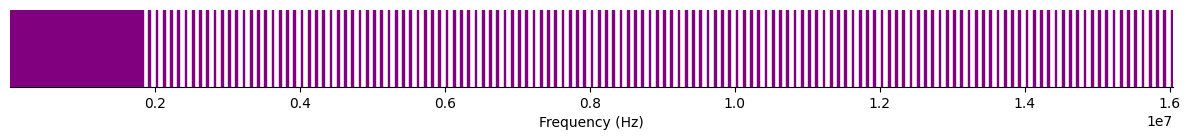

In [15]:
fig, ax = plt.subplots(figsize=(15, 1))
fmoc.plot_frequencies(ax, color="purple")
# this method plots the frequency ranges in log scale by default
# but we can change it to linear if needed
ax.set(xscale="linear")
# and any customization on the ax of fig objects will work too
ax.spines[["left", "top", "right"]].set_visible(False)

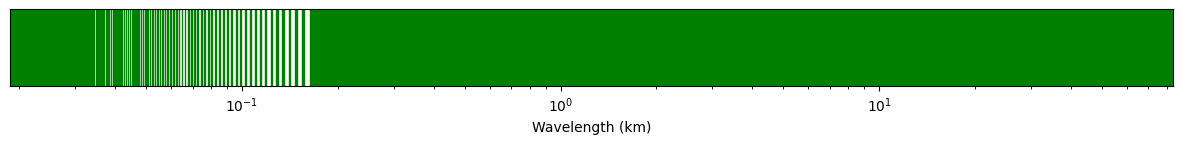

In [11]:
fig, ax = plt.subplots(figsize=(15, 1))
fmoc.plot_wavelengths(ax, color="g", length_unit="km")

We create a dictionnary of FMOCs with less and less precise order ranging from 50 to 10.

In [12]:
print(
    f"we first create an initial FMOC at order {fmoc.max_order}"
    " and then generate the dictionnary",
)
fmocs = {n: fmoc.degrade_to_order(n) for n in np.linspace(50, 10, 5, dtype=int)}

we first create an initial FMOC at order 50 and then generate the dictionnary


In [13]:
for order in fmocs:
    print(
        f"At order {order}, this F-MOC has {len(fmocs[order].to_hz_ranges())} "
        "non overlapping spectral intervals",
    )

At order 50, this F-MOC has 143 non overlapping spectral intervals
At order 40, this F-MOC has 143 non overlapping spectral intervals
At order 30, this F-MOC has 143 non overlapping spectral intervals
At order 20, this F-MOC has 143 non overlapping spectral intervals
At order 10, this F-MOC has 1 non overlapping spectral intervals


In [14]:
for order in fmocs:
    print(
        f"At order {order}, the spectrum covers {round(fmocs[order].to_hz_ranges()[0][0])} Hz"
        " to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz",
    )

At order 50, the spectrum covers 3593 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz
At order 40, the spectrum covers 3593 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz
At order 30, the spectrum covers 3593 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz
At order 20, the spectrum covers 3593 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz
At order 10, the spectrum covers 3584 Hz to {round(fmocs[order].to_hz_ranges()[-1][1])} Hz


Next step is FT-MOC, in order to manage the time series of sweep. 

**NB:** Cassini/RPWS observed continously from january 2000 to september 2017 :-) 